In [6]:
import numpy as np
timeSeries = np.arange(27)
timeSeries

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [7]:
def split_train_cv_test_forwardChaining(sequence, n_steps_input, n_steps_forecast, n_steps_jump):
    X, y, Xcv, ycv, Xtest, ytest = dict(), dict(), dict(), dict(), dict(), dict()
    j=2; # Tracks index of CV set at each train/val/test split
    
    # Iterate through all train/val/test splits
    while 1:
        start_ix=0; end_ix=0; startCv_ix=0; endCv_ix=0; startTest_ix=0; endTest_ix=0;
        X_it, y_it, Xcv_it, ycv_it, Xtest_it, ytest_it = list(), list(), list(), list(), list(), list()
        i=0; # Index of individual training set at each train/val/test split
        
        # Iterate until index of individual training set is smaller than index of cv set
        while (i < j):
            ## TRAINING DATA
            start_ix = n_steps_jump*i;
            end_ix = start_ix + n_steps_input;
            
            seq_x = sequence[start_ix:end_ix] 
            X_it.append(seq_x)
            seq_y = sequence[end_ix:end_ix+n_steps_forecast]
            y_it.append(seq_y)
            
            i+=1;
          
        # Once test data crosses time series length return   
        if ((((end_ix+n_steps_input)+n_steps_input)+n_steps_forecast) > (len(sequence))):
            break
        
        ## CROSS-VALIDATION DATA
        startCv_ix = end_ix;
        endCv_ix = end_ix + n_steps_input;
        
        seq_xcv = sequence[startCv_ix:endCv_ix] 
        Xcv_it.append(seq_xcv)
        seq_ycv = sequence[endCv_ix:endCv_ix+n_steps_forecast]
        ycv_it.append(seq_ycv) 
        
        ## TEST DATA
        startTest_ix = endCv_ix;
        endTest_ix = endCv_ix + n_steps_input;
        
        seq_xtest = sequence[startTest_ix:endTest_ix] 
        Xtest_it.append(seq_xtest)
        seq_ytest = sequence[endTest_ix:endTest_ix+n_steps_forecast]
        ytest_it.append(seq_ytest) 
            
        ## Add another train/val/test split 
        X[j-2] = np.array(X_it)
        y[j-2] = np.array(y_it)
        Xcv[j-2] = np.array(Xcv_it)
        ycv[j-2] = np.array(ycv_it)
        Xtest[j-2] = np.array(Xtest_it)
        ytest[j-2] = np.array(ytest_it)
        
        j+=1;
            
    return X, y, Xcv, ycv, Xtest, ytest

X, y, Xcv, ycv, Xtest, ytest = split_train_cv_test_forwardChaining(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)
for j in np.arange(3):
    print("--------- SET %d ---------" % (j+1))
    print("X[%d] ="% (j+1), *X[j])
    print("y[%d] ="% (j+1), *y[j])
    print("Xcv[%d] ="% (j+1), *Xcv[j])
    print("ycv[%d] ="% (j+1), *ycv[j])
    print("Xtest[%d] ="% (j+1), *Xtest[j])
    print("ytest[%d] ="% (j+1), *ytest[j])

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5]
y[1] = [4 5 6] [6 7 8]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
Xtest[1] = [10 11 12 13]
ytest[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7]
y[2] = [4 5 6] [6 7 8] [ 8  9 10]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
Xtest[3] = [14 15 16 17]
ytest[3] = [18 19 20]


In [11]:
def split_train_cv_test_kFold(sequence, n_steps_input, n_steps_forecast, n_steps_jump):
    X, y, Xcv, ycv, Xtest, ytest = dict(), dict(), dict(), dict(), dict(), dict()
    j=2;  # Tracks index of CV set at each train/val/test split
    theEnd = 0; # Flag to terminate function
    
    # Iterate until test set falls outside time series length
    while 1:
        start_ix=0; end_ix=0; startCv_ix=0; endCv_ix=0; startTest_ix=0; endTest_ix=0;
        X_it, y_it, Xcv_it, ycv_it, Xtest_it, ytest_it = list(), list(), list(), list(), list(), list()
        i=0; # Index of individual training set at each train/val/test split
        n=0; # Number of n_steps_jump
        
        # Iterate through all train/val/test splits
        while 1:
            if (i != j): 
                ## TRAINING DATA
                start_ix = endTest_ix + n_steps_jump*n;
                end_ix = start_ix + n_steps_input;
                n += 1;

                # Leave train/val/test split loop once training data crosses time series length
                if end_ix+n_steps_forecast > len(sequence):
                    break;

                seq_x = sequence[start_ix:end_ix] 
                X_it.append(seq_x)
                seq_y = sequence[end_ix:end_ix+n_steps_forecast]
                y_it.append(seq_y)
            else:
                
                # Once test data crosses time series length return   
                if ((((end_ix+n_steps_input)+n_steps_input)+n_steps_forecast) > (len(sequence))):
                    theEnd = 1;
                    break
                    
                n=0;
                i+=1;
                
                ## CROSS-VALIDATION DATA
                startCv_ix = end_ix;
                endCv_ix = end_ix + n_steps_input;
                
                seq_xcv = sequence[startCv_ix:endCv_ix] 
                Xcv_it.append(seq_xcv)
                seq_ycv = sequence[endCv_ix:endCv_ix+n_steps_forecast]
                ycv_it.append(seq_ycv)
                
                ## TEST DATA
                startTest_ix = endCv_ix;
                endTest_ix = endCv_ix + n_steps_input;

                seq_xtest = sequence[startTest_ix:endTest_ix] 
                Xtest_it.append(seq_xtest)
                seq_ytest = sequence[endTest_ix:endTest_ix+n_steps_forecast]
                ytest_it.append(seq_ytest) 
                
            i+=1;
        
        # Only add a train/val/test split if the time series length has not been crossed
        if (theEnd == 1):
            break
        
        ## Add another train/val/test split 
        X[j-2] = np.array(X_it)
        y[j-2] = np.array(y_it)
        Xcv[j-2] = np.array(Xcv_it)
        ycv[j-2] = np.array(ycv_it)
        Xtest[j-2] = np.array(Xtest_it)
        ytest[j-2] = np.array(ytest_it)
        
        j+=1;
            
    return X, y, Xcv, ycv, Xtest, ytest

X, y, Xcv, ycv, Xtest, ytest = split_train_cv_test_kFold(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)
for j in np.arange(3):
    print("--------- SET %d ---------" % (j+1))
    print("X[%d] ="% (j+1), *X[j])
    print("y[%d] ="% (j+1), *y[j])
    print("Xcv[%d] ="% (j+1), *Xcv[j])
    print("ycv[%d] ="% (j+1), *ycv[j])
    print("Xtest[%d] ="% (j+1), *Xtest[j])
    print("ytest[%d] ="% (j+1), *ytest[j])

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
Xtest[1] = [10 11 12 13]
ytest[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [18 19 20 21] [20 21 22 23]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [22 23 24] [24 25 26]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
Xtest[3] = [14 15 16 17]
ytest[3] = [18 19 20]


In [13]:
def split_train_cv_test_multipleKFold(sequence, n_steps_input, n_steps_forecast, n_steps_jump):
    X, y, Xcv, ycv, Xtest, ytest = dict(), dict(), dict(), dict(), dict(), dict()
    
    # Iterate through 5 train/val/test splits
    for j in np.arange(5):
        start_ix=0; end_ix=0; startCv_ix=0; endCv_ix=0; startTest_ix=0; endTest_ix=0;
        X_it, y_it, Xcv_it, ycv_it, Xtest_it, ytest_it = list(), list(), list(), list(), list(), list()
        i=0; # Index of individual training set at each train/val/test split
        n=0; # Number of n_steps_jump
        
        while 1: 
            if ((i+1+j)%(5) != 0):
                # TRAINING DATA
                start_ix = endTest_ix + n_steps_jump*n;
                end_ix = start_ix + n_steps_input;
                n+=1;

                # Leave train/val/test split loop if train data crosses time series length
                if end_ix+n_steps_forecast > len(sequence):
                    break 

                seq_x = sequence[start_ix:end_ix] 
                X_it.append(seq_x)
                seq_y = sequence[end_ix:end_ix+n_steps_forecast]
                y_it.append(seq_y)
            else:
                # CROSS-VALIDATION DATA
                startCv_ix = end_ix;
                endCv_ix = end_ix + n_steps_input;
                
                # Leave train/val/test split loop if val data crosses time series length  
                if ((endCv_ix+n_steps_forecast) > len(sequence)):
                    break

                seq_xcv = sequence[startCv_ix:endCv_ix] 
                Xcv_it.append(seq_xcv)
                seq_ycv = sequence[endCv_ix:endCv_ix+n_steps_forecast]
                ycv_it.append(seq_ycv)
                
                # TEST DATA
                startTest_ix = endCv_ix;
                endTest_ix = endCv_ix + n_steps_input;

                # Leave train/val/test split loop if test data crosses time series length  
                if ((endTest_ix+n_steps_forecast) > len(sequence)):
                    break

                seq_xtest = sequence[startTest_ix:endTest_ix] 
                Xtest_it.append(seq_xtest)
                seq_ytest = sequence[endTest_ix:endTest_ix+n_steps_forecast]
                ytest_it.append(seq_ytest) 
                
                n=0;
                i+=1;
                
            i+=1;
            
        ## Add another train/val split     
        X[j] = np.array(X_it)
        y[j] = np.array(y_it)
        Xcv[j] = np.array(Xcv_it)
        ycv[j] = np.array(ycv_it)
        Xtest[j] = np.array(Xtest_it)
        ytest[j] = np.array(ytest_it)
            
    return X, y, Xcv, ycv, Xtest, ytest

X, y, Xcv, ycv, Xtest, ytest = split_train_cv_test_multipleKFold(timeSeries, n_steps_input=4, n_steps_forecast=3, n_steps_jump=2)
for j in np.arange(3):
    print("--------- SET %d ---------" % (j+1))
    print("X[%d] ="% (j+1), *X[j])
    print("y[%d] ="% (j+1), *y[j])
    print("Xcv[%d] ="% (j+1), *Xcv[j])
    print("ycv[%d] ="% (j+1), *ycv[j])
    print("Xtest[%d] ="% (j+1), *Xtest[j])
    print("ytest[%d] ="% (j+1), *ytest[j])

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [22 23 24] [24 25 26]
Xcv[1] = [10 11 12 13]
ycv[1] = [14 15 16]
Xtest[1] = [14 15 16 17]
ytest[1] = [18 19 20]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [14 15 16 17] [16 17 18 19] [18 19 20 21]
y[3] = [4 5 6] [6 7 8] [18 19 20] [20 21 22] [22 23 24]
Xcv[3] = [6 7 8 9]
ycv[3] = [10 11 12]
Xtest[3] = [10 11 12 13]
ytest[3] = [14 15 16]


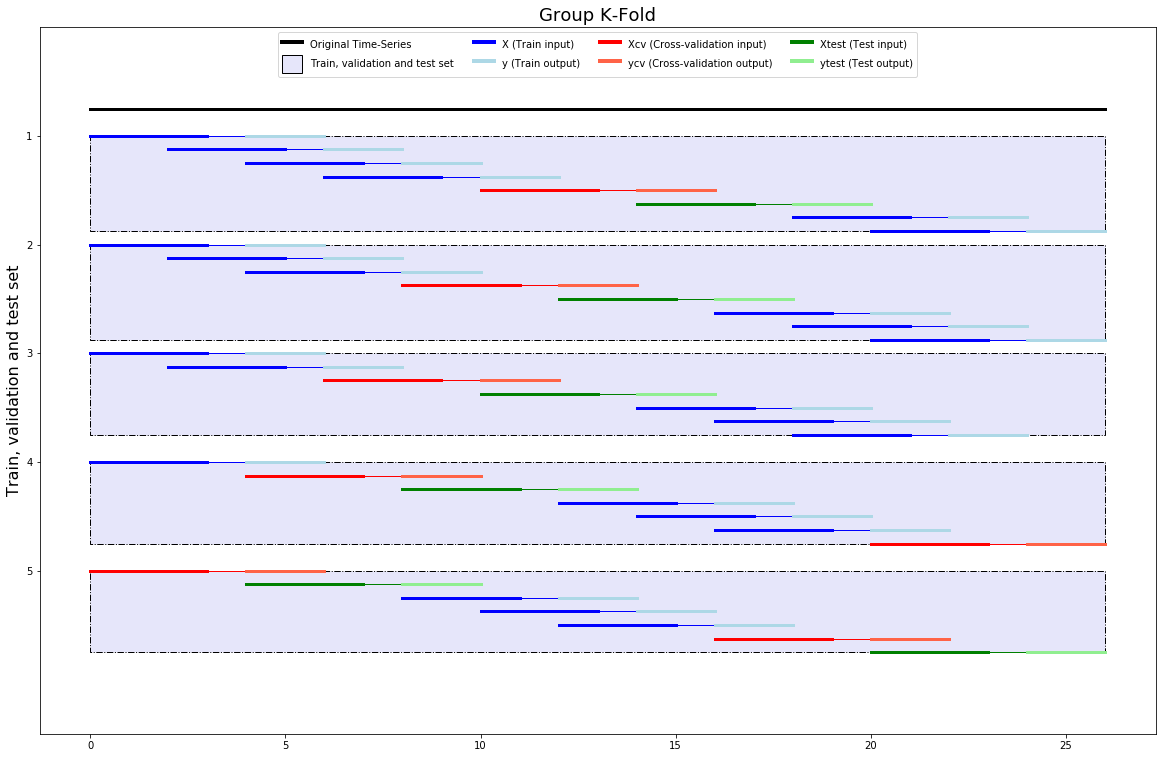

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
# Plot original time series in usage
fig, ax = plt.subplots(figsize=(20, 13))
ax.plot(timeSeries, len(timeSeries) * [len(X)-0.75], lw=3, c='k')
k = 1./max([len(x)+2 for x in X.values()])
numSets = len(X)
# Loop through train/val/test sets
for i in np.arange(numSets):
    sorted_arr = np.sort(np.array([x[0] for x in np.concatenate((X[i], Xcv[i], Xtest[i]), axis=0)]))
    # Loop through training sets
    for j in np.arange(len(X[i])):
        level = sum(sorted_arr<X[i][j][0])
        plt.plot(X[i][j], len(X[i][j]) * [numSets-i-1-k*level], lw=3, c='blue')
        plt.plot([X[i][j][-1], y[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='blue')
        plt.plot(y[i][j], len(y[i][j]) * [numSets-i-1-k*level], lw=3, c='lightblue')
    # Loop through cross-validation sets
    for j in np.arange(len(Xcv[i])):
        level = sum(sorted_arr<Xcv[i][j][0])
        plt.plot(Xcv[i][j], len(Xcv[i][j]) * [numSets-i-1-k*level], lw=3, c='red')
        plt.plot([Xcv[i][j][-1], ycv[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='red')
        plt.plot(ycv[i][j], len(ycv[i][j]) * [numSets-i-1-k*level], lw=3, c='tomato')
    # Loop through test sets
    for j in np.arange(len(Xtest[i])):
        level = sum(sorted_arr<Xtest[i][j][0])
        plt.plot(Xtest[i][j], len(Xtest[i][j]) * [numSets-i-1-k*level], lw=3, c='green')
        plt.plot([Xtest[i][j][-1], ytest[i][j][0]], 2*[numSets-i-1-k*level], lw=1, c='green')
        plt.plot(ytest[i][j], len(ytest[i][j]) * [numSets-i-1-k*level], lw=3, c='lightgreen')
    rect = patches.Rectangle((0, len(X)-i-1), len(timeSeries)-1, k*(-len(sorted_arr)+1), 
                             ls='-.', linewidth=1, edgecolor='k',facecolor='lavender')
    ax.add_patch(rect)
ax.grid(which='minor')
ax.set_yticks(np.arange(len(X), 0, -1)-1)
ax.set_yticklabels(np.arange(1, len(X)+1, 1))
ax.set_ylabel("Train, validation and test set", size=16)
custom_lines = [Line2D([0], [0], color='k', lw=4),    patches.Patch(facecolor='lavender', edgecolor='k'),
                Line2D([0], [0], color='blue', lw=4), Line2D([0], [0], color='lightblue', lw=4),
                Line2D([0], [0], color='red', lw=4),  Line2D([0], [0], color='tomato', lw=4),
                Line2D([0], [0], color='green', lw=4),  Line2D([0], [0], color='lightgreen', lw=4)]
ax.legend(custom_lines, ['Original Time-Series', 'Train, validation and test set', 
                         'X (Train input)', 'y (Train output)', 
                         'Xcv (Cross-validation input)', 'ycv (Cross-validation output)',
                         'Xtest (Test input)', 'ytest (Test output)'], 
          loc='upper center', ncol=4, handleheight=2.4, labelspacing=0.05)
ax.set_ylim([-1.5, len(X)])
ax.set_title('Group K-Fold', size=18);
plt.show()